In [1]:
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator



In [10]:
# Load IT sector index (example: NASDAQ-100 Technology Sector Index - ^NDXT)
ticker = "^NDXT"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
data.columns = data.columns.get_level_values(0)
data.to_csv("../data/it_index_data.csv")  # Save raw data

[*********************100%***********************]  1 of 1 completed


In [12]:
# Feature Engineering
data['SMA_5'] = SMAIndicator(data['Close'], window=5).sma_indicator()
data['SMA_10'] = SMAIndicator(data['Close'], window=10).sma_indicator()
data['RSI'] = RSIIndicator(data['Close'], window=14).rsi()
#relative strength index 70-30
data['Return'] = data['Close'].pct_change()
#(Today’s Close−Yesterday’s Close)/Yesterday’s Close
data['Target'] = data['Close'].shift(-1)  # next-day close

In [13]:
# Drop NA values
data = data.dropna()
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_5', 'SMA_10', 'RSI',
       'Return', 'Target'],
      dtype='object', name='Price')

In [14]:
# Features & Labels
features = ['Close', 'Volume', 'SMA_5', 'SMA_10', 'RSI', 'Return']
X = data[features]
y = data['Target']

In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


MSE: 24235.80944425144
R^2: 0.8550891216119363


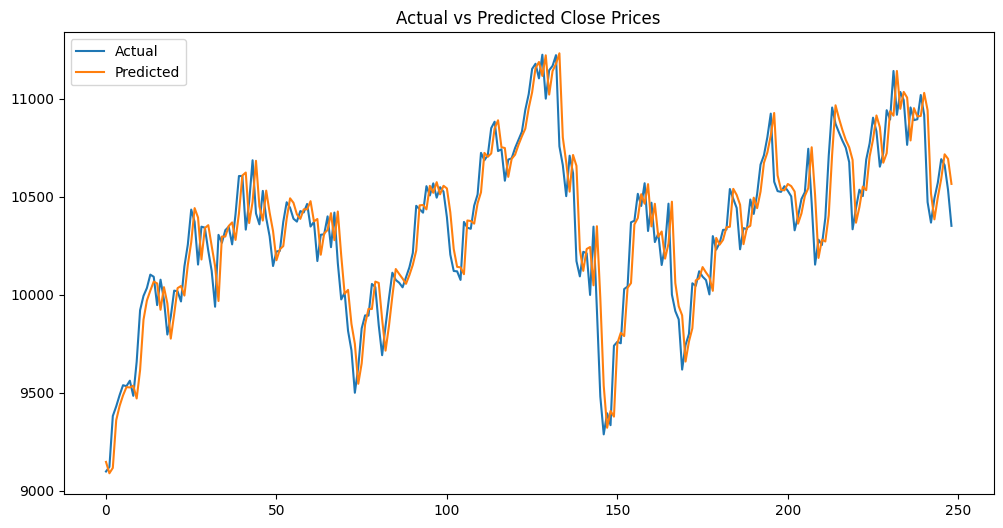

['../model/scaler.pkl']

In [19]:


# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()

# Save model and scaler
joblib.dump(model, '../model/regression_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')
